# 1 - Perkenalan

<p> Nama : Shafira Laksitasari </p>
<p> Batch : FTDS-014 </p>
<p> Dataset : Uber and Lyft Dataset Boston, MA </p>
<p> Objective : Mememprediksi harga perjalanan platform ride-hailing  </p>

## Description
In this case, we are given a dataset containing the travel history of Uber and Lyft passengers in the City of Boston. This dataset includes time, platform name (Lyft and Uber), location, weather, temperature, etc. With this data we are asked to create a Regression model using Linear Regression to predict trip prices with provided dataset.
(Dataset Link : https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma)


## Objective

Create a Regression model using Linear Regression to predict ride-hailing platform ride prices with the Uber and Lyft Dataset  dataset.

# 2 - Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bitarray import test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import joblib
import json

from scipy.stats import norm
import statsmodels.api as sm
import pylab as py

In [4]:
import sklearn

In [5]:
sklearn.__version__

'1.0.2'

# 3 - Data Loading

In [2]:
# Display max column
pd.set_option("display.max.columns", None)

In [3]:
# Import data
df = pd.read_csv('h8dsft_P1G1_shafira_laksitasari.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'h8dsft_P1G1_shafira_laksitasari.csv'

Ukuran Raw Dataset diatas adalah (693071, 57) yang artinya terdapat 693071 baris dan 57 kolom.

In [ ]:
# Rename Columns
df.rename(columns={'cab_type' : 'service_provider', 'name' : 'cab_type', 'short_summary' : 'weather_info'}, inplace=True)

In [ ]:
# Check Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   service_provider             693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  cab_type                     693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Pada info mengenai data frame diatas, terdapat satu ketidakcocokan data type yaitu 'datetime' yang memiliki format object padahal seharusnya formatnya adalah datetime.

In [ ]:
# Change datetime type into date time
df['datetime']=pd.to_datetime(df['datetime'])

In [ ]:
# Check whether there are any other null data
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
service_provider                   0
product_id                         0
cab_type                           0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
weather_info                       0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Terdapat satu kolom yang memuat null, yaitu kolom 'price'. Jumlah null data pada kolom 'price' adalah 55095 dimana bisa dibilang kekosongan tersebut cukup banyak. Akan tetapi karena Missing Value tersebut berada di kolom yang nantinya menjadi 'Target', maka pada baris yang memuat null tersebut nantinya akan dihapus.

In [ ]:
# Check Dataset for mean, std, min, qartile, and max
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

Pada data diatas, untuk platform ride hailing Uber dan Lyft apabila digabungkan keduanya memiliki rata-rata tarif perjalanan sebesar $16.54 dengan tarif terkecilnya $2.5 dan tarif terbesarnya $97.50. 

Jarak rata-rata yang ditempuh tiap penumpang adalah 2.18 (unknown unit) dengan jarak terjauhnya adalah 7.86 (unknown unit).

# 4 - Exploratory Data Analysis (EDA)

In [ ]:
df.sort_values(by=['datetime'])

,id,timestamp,hour,day,month,datetime,timezone,source,destination,service_provider,product_id,cab_type,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,weather_info,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
66422,a7b50600-c6c5-4e6c-bea9-4487344196d4,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North Station,Haymarket Square,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,7.0,0.56,1.0,42.3429,-71.1003,41.83,41.83,Foggy,Rain in the morning and afternoon.,0.0,0.0,0.92,0.51,0.80,1543150800,1.685,46.15,1543154400,40.15,1543233600,43.17,1543186800,39.21,1543233600,fog,39.62,1014.10,57,1.00,0,1.685,317.9,1543146539,1543180617,0.60,0.1396,1543161600,40.61,1543122000,46.15,1543154400,38.23,1543136400,43.17,1543186800
446073,9962f244-8fce-4ae9-a583-139d5d7522e1,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Theatre District,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.57,1.0,42.3429,-71.1003,41.83,41.83,Foggy,Rain in the morning and afternoon.,0.0,0.0,0.92,0.51,0.80,1543150800,1.685,46.15,1543154400,40.15,1543233600,43.17,1543186800,39.21,1543233600,fog,39.62,1014.10,57,1.00,0,1.685,317.9,1543146539,1543180617,0.60,0.1396,1543161600,40.61,1543122000,46.15,1543154400,38.23,1543136400,43.17,1543186800
184332,4aa68a5d-abc0-4fdf-a47f-0003617afbae,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North End,West End,Lyft,lyft,Lyft,7.0,1.23,1.0,42.3429,-71.1003,41.83,41.83,Foggy,Rain in the morning and afternoon.,0.0,0.0,0.92,0.51,0.80,1543150800,1.685,46.15,1543154400,40.15,1543233600,43.17,1543186800,39.21,1543233600,fog,39.62,1014.10,57,1.00,0,1.685,317.9,1543146539,1543180617,0.60,0.1396,1543161600,40.61,1543122000,46.15,1543154400,38.23,1543136400,43.17,1543186800
167114,ef8b695c-c24d-4ac1-b3fe-4aa1a7ed79f4,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,Boston University,Beacon Hill,Lyft,lyft_premier,Lux,19.5,2.66,1.0,42.3429,-71.1003,41.83,41.83,Foggy,Rain in the morning and afternoon.,0.0,0.0,0.92,0.51,0.80,1543150800,1.685,46.15,1543154400,40.15,1543233600,43.17,1543186800,39.21,1543233600,fog,39.62,1014.10,57,1.00,0,1.685,317.9,1543146539,1543180617,0.60,0.1396,1543161600,40.61,1543122000,46.15,1543154400,38.23,1543136400,43.17,1543186800
184333,89f35ef7-7129-483d-b3e6-d89afdf6946d,1.543204e+09,3,26,11,2018-11-26 03:40:46,America/New_York,North End,West End,Lyft,lyft_line,Shared,5.0,1.23,1.0,42.3429,-71.1003,41.83,41.83,Foggy,Rain in the morning and afternoon.,0.0,0.0,0.92,0.51,0.80,1543150800,1.685,46.15,1543154400,40.15,1543233600,43.17,1543186800,39.21,1543233600,fog,39.62,1014.10,57,1.00,0,1.685,317.9,1543146539,1543180617,0.60,0.1396,1543161600,40.61,1543122000,46.15,1543154400,38.23,1543136400,43.17,1543186800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34918,e299c3bf-a429-4b19-af4a-ebd8e9ad74f7,1.545161e+09,19,18,12,2018-12-18 19:15:10,America/New_York,Financial District,Haymarket Square,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,7.0,1.25,1.0,42.3519,-71.0551,32.34,22.99,Clear,Mostly cloudy throughout the day.,0.0,0.0,0.38,12.52,18.45,1545127200,9.883,32.97,1545159600,20.95,1545220800,22.90,1545159600,14.26,1545195600,clear-day,9.81,1011.55,321,0.01,0,9.883,372.6,1545134992,1545167681,0.37,0.0029,1545152400,23.11,15451920

Terdapat sebanyak 693070 penumpang yang memilih Uber atau Lift sebagai opsi ride provider selama Bulan November dari tanggal 26 sampai Desember tanggal 18 di tahun 2018.

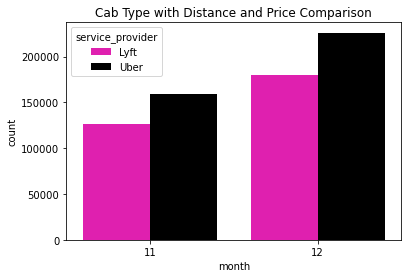

In [ ]:
sns.countplot(x='month', data=df, hue='service_provider', palette=["#ff00bf", '#000000'])
plt.title('Cab Type with Distance and Price Comparison')
plt.show()

In [ ]:
df['service_provider'].value_counts()

Uber    385663
Lyft    307408
Name: service_provider, dtype: int64

In [ ]:
df[(df['price'] == df['price'].max())].service_provider

597071    Lyft
Name: service_provider, dtype: object

In [ ]:
df[(df['price'] == df['price'].min())].service_provider.value_counts()

Lyft    211
Name: service_provider, dtype: int64

Selama 2 bulan terakhir di tahun 2018, secara berturut-turut Uber memiliki penumpang yang lebih banyak jumlahnya dari Lyft dengan total selisih selama 2 bulan sebanyak 78255 penumpang. 

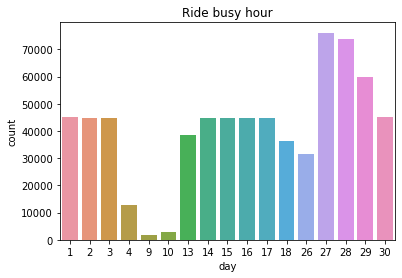

In [ ]:
sns.countplot(x='day', data=df)
plt.title('Ride busy hour')
plt.show()

In [ ]:
df[(df['day'] == 30)]['month'].value_counts()

11    45084
Name: month, dtype: int64

Data yang tersedia tersebut diambil dari tanggal 1 sampai tanggal 30 setiap bulannya untuk kedua platform. Ada beberapa tanggal yang missing yaitu tanggal 5-8, 11-12, 19-25, dan tanggal 31. Rentan data pada tanggal 1-18 diambil dari bulan 11 sedangkan sisanya yaitu tanggal 26-30 diambil dari bulan 12. Tidak diketahui apa faktor ketidaksediaan date tersebut. Namun berdasarkan data yang tersedia dapat dilihat bahwa tanggal yang paling ramai penumpang ada di range tanggal 27-29. Tanggal tersebutlah yang membuat kuantitas penumpang tinggi di bulan 12 pada histogram sebelumnya.

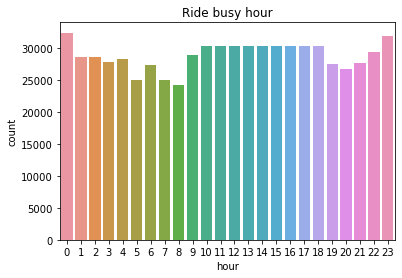

In [ ]:
sns.countplot(x='hour', data=df)
plt.title('Ride busy hour')
plt.show()

Waktu yang paling ramai penumpang adalah malam hari yaitu pada jam 11-12 malam sedangkan waktu yang paling sedikit penumpang adalah pagi hari yaitu pada jam 8 pagi. Dapat dilihat pada grafik bahwa data diambil satu hari full dari pukul 12 pagi (0) hingga pukul 11 malam (23). 

Text(0.5, 1.0, 'Price and Distance')

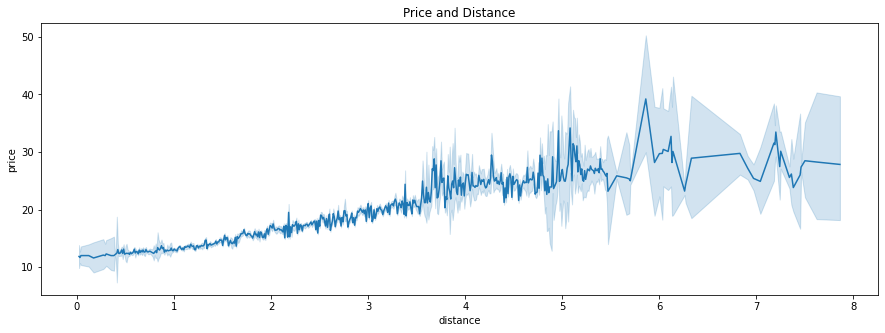

In [ ]:
plt.figure(figsize = (15,5))
# sns.barplot(x=df['distance'], y=df['price'])
# sns.lineplot(x=df['distance'], y=df['price'], data = df)
sns.lineplot(x='distance', y='price', data = df)
plt.title('Price and Distance')

Terdapat kecenderungan hubungan positif antara 'price' dengan 'distance' dimana semakin jauh distance maka seakin tinggi price nya. Ada beberapa faktor lain yang kemungkinan mempengaruhi harga selain jarak yang menyababkan linenya dibeberapa kondisi naik dan turun.

In [ ]:
df['cab_type'].value_counts().sort_values

<bound method Series.sort_values of UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: cab_type, dtype: int64>

Dua platform jasa kendaraan pada dataset tersebut masing-masing memiliki jenis kendaraannya sendiri. Untuk Uber terdapat UberXL, WAV, Black SUV, Black, Taxi, UberX, dan UberPool sedangkan Lyft terdapat Lux, Lyft, Lux Black XL, Lyft XL, Lux Black, and Shared. Beberapa 'cab_type' tersebut dibagi berdasarkan jenis, ukuran atau kumewahan kendaraannnya (biasanya untuk event).

/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


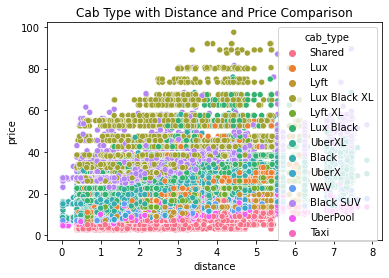

In [ ]:
sns.scatterplot(x='distance', y='price', data=df, hue='cab_type')
plt.title('Cab Type with Distance and Price Comparison')
plt.show()

Masing-masing jenis kendaraan sebelumnya meemiliki 'price' yang berbeda. Apabila dilihat dari persebaran plot di atas, kita dapat melihat bahwa Lux Black XL oleh Lyft meskipun jaraknya berbeda-beda namun tarifnya tetap sama. Hal ini kurang dijelaskan di dataset bahwa kemungkinan terdapat variabel lain sepert durasi penyewaan atau durasi menumpang, diskon, atau promo yang mungkin bisa mempengaruhi tarif kendaraan tersebut. 

/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


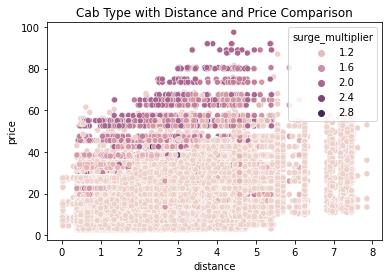

In [ ]:
sns.scatterplot(x='distance', y='price', data=df, hue='surge_multiplier')
plt.title('Cab Type with Distance and Price Comparison')
plt.show()

'surge multiplier' adalah pemberian tarif sesuai dengan suatu kondisi dimana jumlah penumpang yang available lebih banyak dari jumlah driver yang available. Jadi  Surge multiplier tersebut merupakan salah satu faktor yang menentukan tarif akhir 'price' disuatu waktu karena setap saat suply dan demand dapat berubah-ubah. Surge ini merupakan nominal yang yang sudah ditentukan, untuk itu data pada kolom ini nantinya masuk ke dalam data categorical.

/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


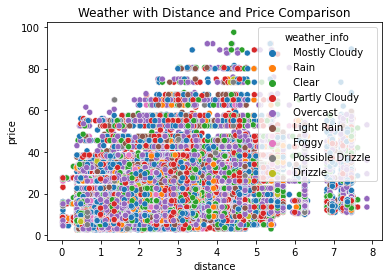

In [ ]:
sns.scatterplot(x='distance', y='price', data=df, hue='weather_info')
plt.title('Weather with Distance and Price Comparison')
plt.show()

Selanjutnya memeriksa korelasi antara harga dengan cuaca. Kebanyakan penumpang ramai menggunakan jasa transportasi tersebut saat cuacanya mendung (overcast) namun dari data persebarannya cukup fair jadi cuaca tidak berpengaruh terhadap tarif sewa/menumpang.

/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


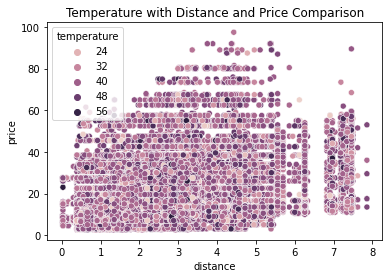

In [ ]:
sns.scatterplot(x='distance', y='price', data=df, hue='temperature')
plt.title('Temperature with Distance and Price Comparison')
plt.show()

Begitu pula dengan temperature, persebaran datanya juga cukup merata jadi suhu tidak berpengaruh terhadap tarif sewa/menumpang.

In [ ]:
df['source'].value_counts().sort_index()

Back Bay                   57792
Beacon Hill                57403
Boston University          57764
Fenway                     57757
Financial District         58857
Haymarket Square           57736
North End                  57763
North Station              57118
Northeastern University    57756
South Station              57750
Theatre District           57813
West End                   57562
Name: source, dtype: int64

In [ ]:
df['destination'].value_counts().sort_index()

Back Bay                   57780
Beacon Hill                57403
Boston University          57764
Fenway                     57757
Financial District         58851
Haymarket Square           57764
North End                  57756
North Station              57119
Northeastern University    57755
South Station              57749
Theatre District           57798
West End                   57575
Name: destination, dtype: int64

Pada dataset, asal (source) dan destinasi (destination) memiliki tempat dan jumlah yang sama. 

/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


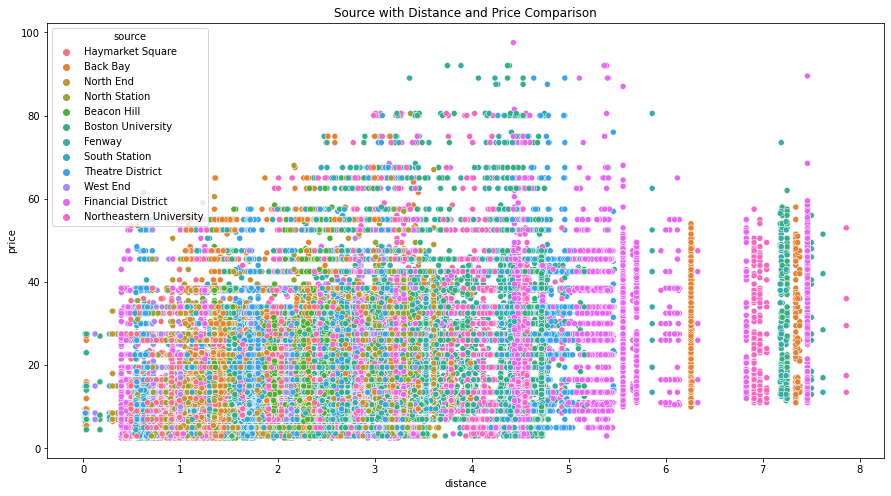

In [ ]:
plt.figure(figsize = (15,8))
sns.scatterplot(x='distance', y='price', data=df, hue='source')
plt.title('Source with Distance and Price Comparison')
plt.show()

/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


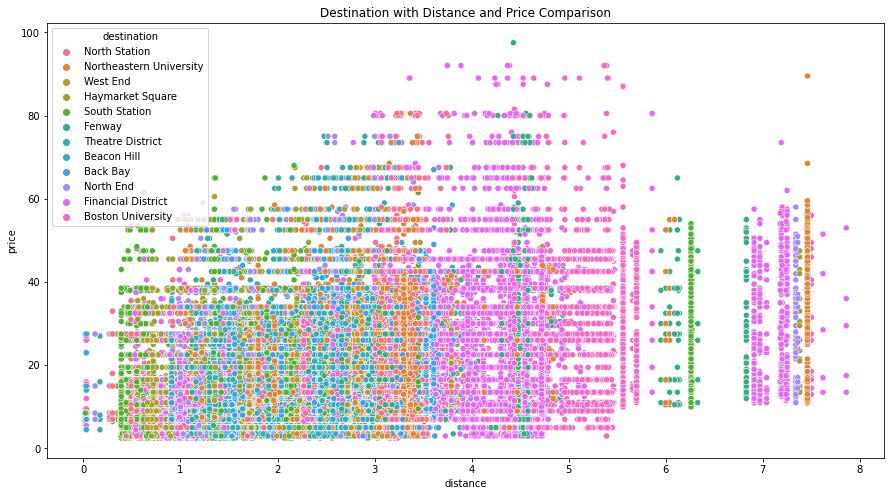

In [ ]:
plt.figure(figsize = (15,8))
sns.scatterplot(x='distance', y='price', data=df, hue='destination')
plt.title('Destination with Distance and Price Comparison')
plt.show()

Dari kedua plot diatas, kita dapat melihat pattern variasi 'source' dan 'destination' berubah secara vertical berbeda dengan 'cab_name' dan 'surge_multiplier'. Sebagai contoh saat jarak yang ditempuh 7 (uknown unit) harganya bisa bermacam-macam untuk satu tujuan. Hal ini mengkonfirmasi bahwa 'cab_name' dan 'surge_multiplier' mempengaruhi 'price'. Namun untuk 'source' dan 'destination' sudah didefiniskan dengan distance. Selain itu pada data ada kecenderungan histori perjalanan diambil dari penumpang yang 'source' dan 'destination' nya sama (dilihat dari pattern warna yang nyaris identik).

# 5 - Data Prepocessing

## Get Inference

In [ ]:
# Get Data for Model Inference

df_inf = df.sample(10, random_state = 50)
df_inf

,id,timestamp,hour,day,month,datetime,timezone,source,destination,service_provider,product_id,cab_type,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,weather_info,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
249150,10c861ba-0259-4307-be1c-7177201f21f5,1.543323e+09,12,27,11,2018-11-27 12:45:22,America/New_York,North Station,South Station,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,28.5,2.17,1.00,42.3519,-71.0551,46.30,44.19,Light Rain,Light rain in the morning.,0.0288,0.94,0.91,4.54,4.54,1543338000,3.295,46.89,1543320000,33.70,1543399200,43.85,1543320000,29.88,1543399200,rain,43.94,988.29,201,1.00,0,3.295,314.0,1543319466,1543353345,0.68,0.1420,1543338000,35.98,1543377600,46.89,1543320000,31.86,1543377600,43.85,1543320000
616167,3dd287e1-7ea7-4dcb-8cbf-fb41b43f621d,1.544813e+09,18,14,12,2018-12-14 18:45:12,America/New_York,Haymarket Square,Theatre District,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.5,1.16,1.00,42.3519,-71.0551,45.82,43.61,Mostly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.51,4.57,4.57,1544846400,9.898,46.65,1544814000,40.76,1544835600,43.86,1544817600,38.56,1544835600,partly-cloudy-day,28.63,1029.95,165,0.56,1,9.898,288.5,1544789234,1544822013,0.24,0.0000,1544806800,27.18,1544781600,46.65,1544814000,24.51,1544785200,43.86,1544817600
215801,c8db3ae3-b4db-46a0-b0ea-9e0119efb287,1.543499e+09,13,29,11,2018-11-29 13:48:03,America/New_York,Fenway,Back Bay,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,7.0,1.50,1.00,42.3503,-71.0810,40.29,34.72,Clear,Partly cloudy throughout the day.,0.0000,0.00,0.60,8.44,12.52,1543514400,9.997,44.89,1543510800,28.64,1543579200,38.68,1543510800,29.29,1543579200,clear-day,27.46,1005.85,309,0.12,0,9.997,335.5,1543492406,1543526101,0.75,0.0000,1543510800,35.26,1543550400,44.89,1543510800,31.25,1543550400,38.68,1543510800
381207,2bb2794f-6a41-421b-971e-a5b10cbdaa0e,1.543527e+09,21,29,11,2018-11-29 21:33:03,America/New_York,Haymarket Square,Theatre District,Lyft,lyft_premier,Lux,13.5,1.21,1.00,42.3519,-71.0551,41.97,36.09,Partly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.55,10.00,15.17,1543514400,9.784,44.76,1543510800,28.78,1543579200,38.44,1543510800,26.32,1543575600,partly-cloudy-night,26.82,1008.97,310,0.31,0,9.784,305.7,1543492400,1543526095,0.75,0.0000,1543510800,35.12,1543550400,44.76,1543510800,30.85,1543550400,38.44,1543510800
287456,a416d46b-4548-4b26-8b50-5b8437ffd63a,1.543757e+09,13,2,12,2018-12-02 13:23:02,America/New_York,Theatre District,Haymarket Square,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.5,1.61,1.00,42.2148,-71.0330,43.57,39.80,Light Rain,Rain throughout the day.,0.0801,1.00,0.92,6.34,7.01,1543755600,2.636,52.86,1543788000,46.60,1543824000,52.19,1543788000,47.25,1543824000,rain,41.38,1015.39,111,1.00,1,2.636,274.6,1543751761,1543785256,0.86,0.1055,1543770000,36.35,1543726800,52.86,1543788000,35.33,1543744800,52.19,1543788000
243935,868db583-7372-4563-8e73-44640edba186,1.543453e+09,0,29,11,2018-11-29 00:48:41,America/New_York,South Station,North Station,Lyft,lyft,Lyft,9.0,1.93,1.00,42.3503,-71.0810,39.41,33.81,Mostly Cloudy,Mostly cloudy throughout the day.,0.0000,0.00,0.69,8.11,12.21,1543431600,9.996,42.72,1543438800,37.59,1543485600,36.75,1543438800,32.25,1543478400,partly-cloudy-night,30.16,996.21,294,0.81,0,9.996,352.8,1543405940,1543439725,0.72,0.0000,1543420800,33.82,1543399200,42.72,1543438800,30.19,1543399200,36.75,1543438800
592383,8ac2eb6c-07bc-4b7

In [ ]:
# Remove Inference-Set from dataset

df_train_test = df.drop(df_inf.index)
df_train_test

,id,timestamp,hour,day,month,datetime,timezone,source,destination,service_provider,product_id,cab_type,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,weather_info,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271

In [ ]:
# Reset Index (Meminimalisir error)

df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,id,timestamp,hour,day,month,datetime,timezone,source,destination,service_provider,product_id,cab_type,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,weather_info,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,10c861ba-0259-4307-be1c-7177201f21f5,1.543323e+09,12,27,11,2018-11-27 12:45:22,America/New_York,North Station,South Station,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,28.5,2.17,1.00,42.3519,-71.0551,46.30,44.19,Light Rain,Light rain in the morning.,0.0288,0.94,0.91,4.54,4.54,1543338000,3.295,46.89,1543320000,33.70,1543399200,43.85,1543320000,29.88,1543399200,rain,43.94,988.29,201,1.00,0,3.295,314.0,1543319466,1543353345,0.68,0.1420,1543338000,35.98,1543377600,46.89,1543320000,31.86,1543377600,43.85,1543320000
1,3dd287e1-7ea7-4dcb-8cbf-fb41b43f621d,1.544813e+09,18,14,12,2018-12-14 18:45:12,America/New_York,Haymarket Square,Theatre District,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.5,1.16,1.00,42.3519,-71.0551,45.82,43.61,Mostly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.51,4.57,4.57,1544846400,9.898,46.65,1544814000,40.76,1544835600,43.86,1544817600,38.56,1544835600,partly-cloudy-day,28.63,1029.95,165,0.56,1,9.898,288.5,1544789234,1544822013,0.24,0.0000,1544806800,27.18,1544781600,46.65,1544814000,24.51,1544785200,43.86,1544817600
2,c8db3ae3-b4db-46a0-b0ea-9e0119efb287,1.543499e+09,13,29,11,2018-11-29 13:48:03,America/New_York,Fenway,Back Bay,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,7.0,1.50,1.00,42.3503,-71.0810,40.29,34.72,Clear,Partly cloudy throughout the day.,0.0000,0.00,0.60,8.44,12.52,1543514400,9.997,44.89,1543510800,28.64,1543579200,38.68,1543510800,29.29,1543579200,clear-day,27.46,1005.85,309,0.12,0,9.997,335.5,1543492406,1543526101,0.75,0.0000,1543510800,35.26,1543550400,44.89,1543510800,31.25,1543550400,38.68,1543510800
3,2bb2794f-6a41-421b-971e-a5b10cbdaa0e,1.543527e+09,21,29,11,2018-11-29 21:33:03,America/New_York,Haymarket Square,Theatre District,Lyft,lyft_premier,Lux,13.5,1.21,1.00,42.3519,-71.0551,41.97,36.09,Partly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.55,10.00,15.17,1543514400,9.784,44.76,1543510800,28.78,1543579200,38.44,1543510800,26.32,1543575600,partly-cloudy-night,26.82,1008.97,310,0.31,0,9.784,305.7,1543492400,1543526095,0.75,0.0000,1543510800,35.12,1543550400,44.76,1543510800,30.85,1543550400,38.44,1543510800
4,a416d46b-4548-4b26-8b50-5b8437ffd63a,1.543757e+09,13,2,12,2018-12-02 13:23:02,America/New_York,Theatre District,Haymarket Square,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.5,1.61,1.00,42.2148,-71.0330,43.57,39.80,Light Rain,Rain throughout the day.,0.0801,1.00,0.92,6.34,7.01,1543755600,2.636,52.86,1543788000,46.60,1543824000,52.19,1543788000,47.25,1543824000,rain,41.38,1015.39,111,1.00,1,2.636,274.6,1543751761,1543785256,0.86,0.1055,1543770000,36.35,1543726800,52.86,1543788000,35.33,1543744800,52.19,1543788000
5,868db583-7372-4563-8e73-44640edba186,1.543453e+09,0,29,11,2018-11-29 00:48:41,America/New_York,South Station,North Station,Lyft,lyft,Lyft,9.0,1.93,1.00,42.3503,-71.0810,39.41,33.81,Mostly Cloudy,Mostly cloudy throughout the day.,0.0000,0.00,0.69,8.11,12.21,1543431600,9.996,42.72,1543438800,37.59,1543485600,36.75,1543438800,32.25,1543478400,partly-cloudy-night,30.16,996.21,294,0.81,0,9.996,352.8,1543405940,1543439725,0.72,0.0000,1543420800,33.82,1543399200,42.72,1543438800,30.19,1543399200,36.75,1543438800
6,8ac2eb6c-07bc-4b7c-aea3-0b1fd84ce4d2,1.545084e+09,22

## Feature Selection

Pada kasus ini, 'Price' nantinya yang akan diprediksi. Oleh karena itu perlu dilakukan penghapusan kolom yang didak diperlukan berdasarkan korelasi pada gambar heatmap dibawah disertai dengan opini pribadi. 

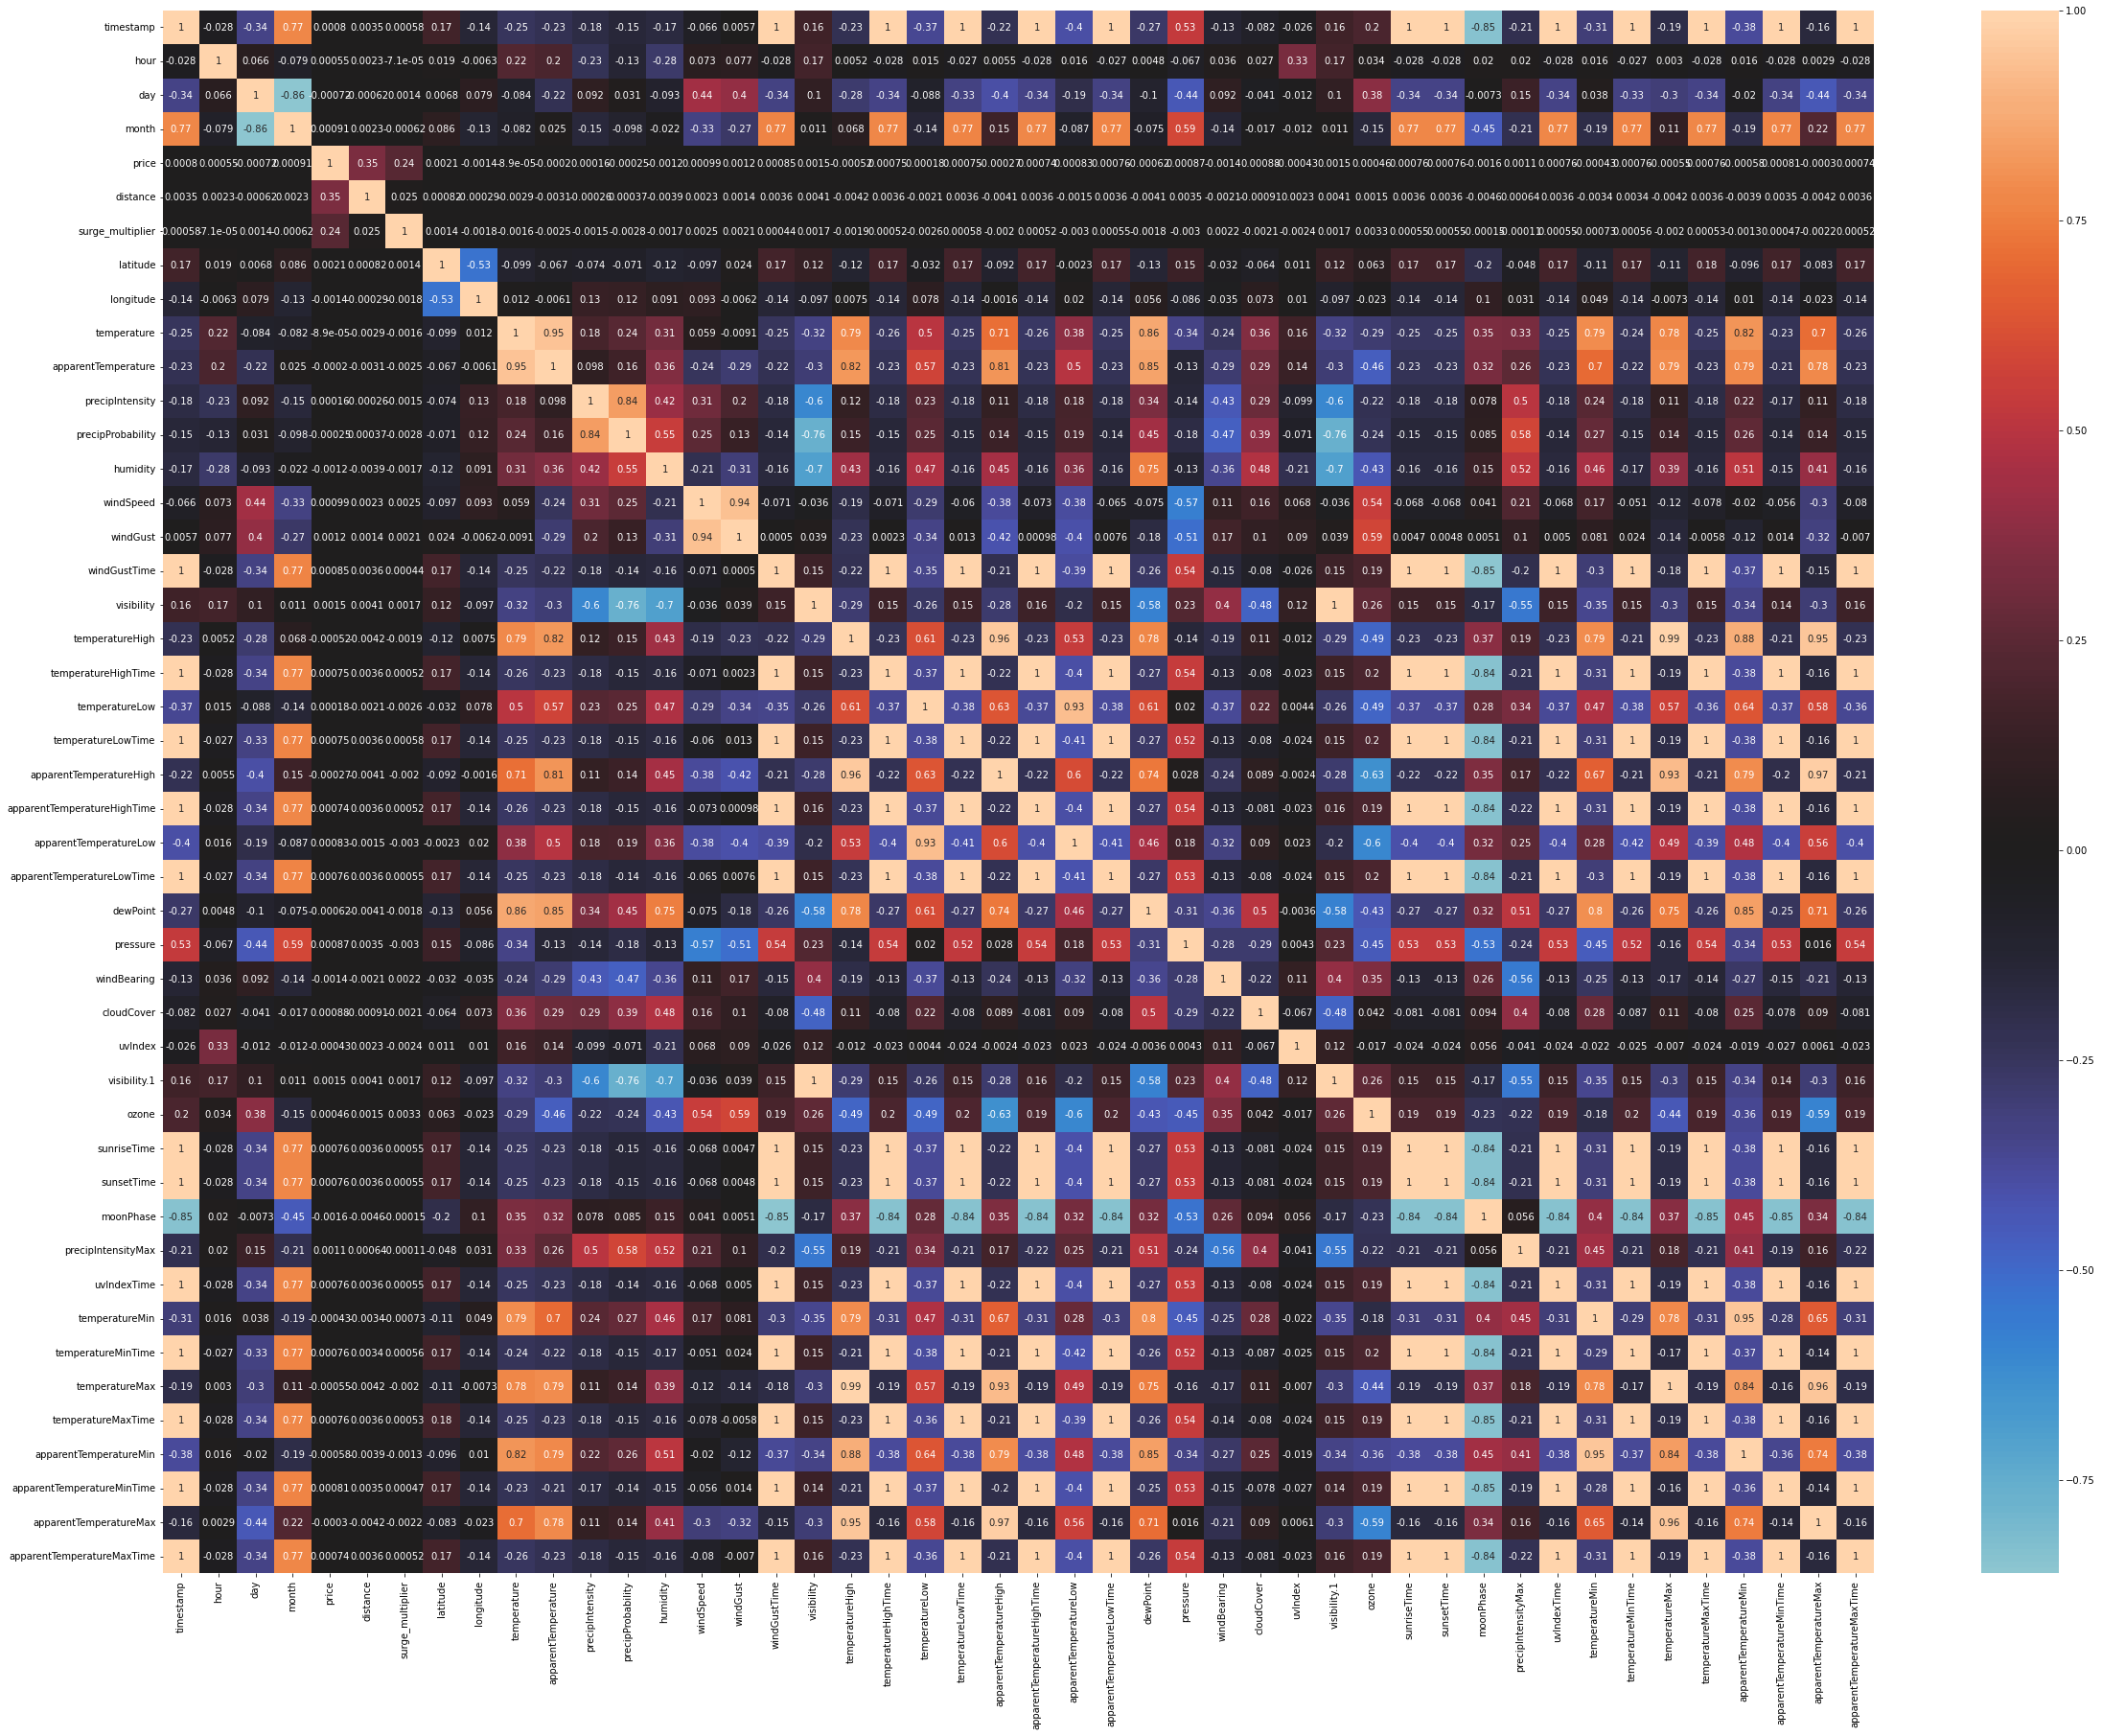

In [ ]:
# Display Heatmap

train_test_corr = df_train_test.corr()

plt.figure(figsize=(40, 30))
sns.heatmap(train_test_corr, annot= True, center=0)
plt.show()

In [ ]:
# Display all columns

df_train_test.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'service_provider', 'product_id', 'cab_type',
       'price', 'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'apparentTemperature', 'weather_info', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'appar

Gambar heatmap di atas mendeskripsikan korelasi antara 'price' dengan data numerical lainnya. Parameter untuk hubungan korelasi tersebut adalah semakin dekat dengan 0 maka semakin tidak ada korelasinya. Terdapat 2 features yang memiliki korelasi yang terbilang cukup yaitu 'distance' dan 'surge_multiplier'. Untuk itu karena data numerical lain korelasinya adalah 0,00... maka data-data tersebut akan di drop. Sedangkan untuk yang kategori berdasarkan gambar scatter plot pada EDA terdapat satu feature yang memiliki korelasi dengan 'price' yaitu 'cab_type'. Feature - feature yang terpilih adalah variabel yang independent antara satu sama lain. 

In [ ]:
# Drop the columns

dropped_col_df = df_train_test.drop(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'service_provider', 'product_id',
       'latitude', 'longitude','temperature', 'apparentTemperature','weather_info','long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime'],axis=1)
dropped_col_df

,cab_type,price,distance,surge_multiplier
0,Shared,5.0,0.44,1.0
1,Lux,11.0,0.44,1.0
2,Lyft,7.0,0.44,1.0
3,Lux Black XL,26.0,0.44,1.0
4,Lyft XL,9.0,0.44,1.0
...,...,...,...,...
693056,UberXL,13.0,1.00,1.0
693057,UberX,9.5,1.00,1.0
693058,Taxi,NaN,1.00,1.0
693059,Black SUV,27.0,1.00,1.0


## Splitting between 'X' (Features) and 'y' (Target)

In [ ]:
# Splitting Features and Target

X = dropped_col_df.drop('price', axis = 1)
y = dropped_col_df['price']

# Display X without the target

X

,cab_type,distance,surge_multiplier
0,Shared,0.44,1.0
1,Lux,0.44,1.0
2,Lyft,0.44,1.0
3,Lux Black XL,0.44,1.0
4,Lyft XL,0.44,1.0
...,...,...,...
693056,UberXL,1.00,1.0
693057,UberX,1.00,1.0
693058,Taxi,1.00,1.0
693059,Black SUV,1.00,1.0


In [ ]:
# Splitting train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13) 

# Checking train and test size

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (554448, 3)
Test Size :  (138613, 3)


## Handling Missing Values

In [ ]:
# Checking missing value in features train

X_train.isnull().sum()

cab_type            0
distance            0
surge_multiplier    0
dtype: int64

In [ ]:
# Checking missing value in features test

X_test.isnull().sum()

cab_type            0
distance            0
surge_multiplier    0
dtype: int64

In [ ]:
# Checking missing value in target train

y_train.isnull().sum()

44201

In [ ]:
# Dropping all missing values in target train

y_train.dropna(inplace=True)
len(y_train)

510247

In [ ]:
# Display current target train

y_train

121338     5.0
553275    16.5
31011     16.5
39772     11.0
427071    22.5
          ... 
167866     7.0
688994    13.5
256742    10.5
253456     7.5
491858     7.5
Name: price, Length: 510247, dtype: float64

In [ ]:
# Filtering with isin to keep the index in features train similiar with target train

X_train = X_train[X_train.index.isin(y_train.index)]
X_train

,cab_type,distance,surge_multiplier
121338,Shared,0.58,1.0
553275,Lux Black,0.56,1.0
31011,Lyft XL,3.18,1.0
39772,Lyft,1.00,2.0
427071,Lux Black,2.13,1.0
...,...,...,...
167866,WAV,1.09,1.0
688994,Lux,1.09,1.0
256742,Lux,0.74,1.0
253456,UberPool,1.23,1.0


In [ ]:
# Checking missing value in target test

y_test.isnull().sum()

10894

In [ ]:
# Dropping all missing values in target test

y_test.dropna(inplace=True)
len(y_test)

127719

In [ ]:
# Display current target test

y_test

692149    11.0
22140     22.5
601915    19.5
192755    20.5
662262    13.0
          ... 
511271    16.5
83447     10.5
212722     7.5
674511     9.0
84611      7.0
Name: price, Length: 127719, dtype: float64

In [ ]:
# Filtering with isin to keep the index in features test similiar with target test

X_test = X_test[X_test.index.isin(y_test.index)]
X_test

,cab_type,distance,surge_multiplier
692149,Lux,1.06,1.0
22140,Lyft XL,3.24,1.0
601915,Lux Black,1.45,1.0
192755,Black,1.80,1.0
662262,UberXL,1.11,1.0
...,...,...,...
511271,Lux,2.31,1.0
83447,WAV,3.07,1.0
212722,WAV,1.16,1.0
674511,UberPool,2.61,1.0


## Handling Outlier

Handling outlier hanya dilakukan di X_train atau Features train. sebelumnya data numerical yang diambil hanyalah distance, oleh karena itu distance ini akan diatasi outliernya dengan bebarapa cara yaitu winsorizing, trimming, dan treat as missing value. Nantinya salah satu metode ini akan dipilih.

### Features Train - Distance

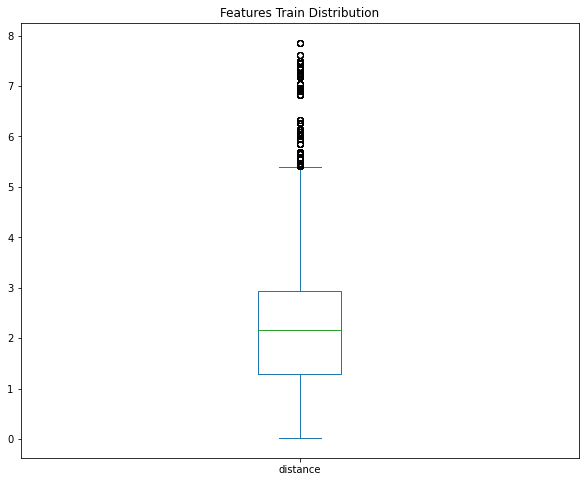

In [ ]:
X_train['distance'].plot(kind='box', title='Features Train Distribution', figsize=(10,8))
plt.show()

In [ ]:
# Calculating features train skewness

X_train_distance_skew = X_train['distance'].skew()
X_train_distance_skew

0.8151753700740995

Skewness sebagai parameter apakah datanya skew normal atau skew extreme. Pada perhitungan diatas dapt dilihat bahwa skew distance pada features train nya adalah normal.

In [ ]:
# Calculating features train iqr

X_train_distance_q3, X_train_distance_q1 = np.percentile(X_train['distance'], [75 ,25])
X_train_distance_iqr = X_train_distance_q3 - X_train_distance_q1
max_X_train_distance_iqr = X_train_distance_q3 + 1.5 * X_train_distance_iqr
max_X_train_distance_iqr

5.405

#### Winsorizing

In [ ]:
# Create a copy

X_train_winso = X_train.copy() 

In [ ]:
# Replace the Value with Upper Boundaries

X_train_winso['distance'].loc[X_train_winso['distance'] > max_X_train_distance_iqr] = max_X_train_distance_iqr

/var/folders/qq/87th93m11rdgx4gf727_j6sm0000gn/T/ipykernel_5627/2001665884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_winso['distance'].loc[X_train_winso['distance'] > max_X_train_distance_iqr] = max_X_train_distance_iqr


In [ ]:
# Checking the previous max

X_train['distance'].max()

7.86

In [ ]:
# Checking the current max

X_train_winso['distance'].max()

5.405

#### Trimming

In [ ]:
# Create a copy

X_train_trim = X_train.copy() 

In [ ]:
# Display data above IQR

X_train_trim_total = X_train_trim[(X_train_trim['distance'] > max_X_train_distance_iqr)]
X_train_trim_total

,cab_type,distance,surge_multiplier
643496,Lux Black,5.41,1.0
263899,Lyft,5.41,1.0
139432,Lux,5.42,1.0
274531,Black,5.56,1.0
639279,UberXL,7.46,1.0
...,...,...,...
89869,UberPool,5.56,1.0
463605,Black SUV,7.25,1.0
432122,Lux Black,5.42,1.0
248896,WAV,5.70,1.0


In [ ]:
# Check if the outlier allowed to trimmed (condition : trimmed data not more than 5% from current data)

if len(X_train_trim_total) <= len(X_train) * 0.05 :
    print ('Allowed to drop')
else:
    print ('Not Allowed to drop')

Allowed to drop


In [ ]:
# Checking the length of previous features train

len(X_train)

510247

In [ ]:
# Drop the columns annd display current target train data

X_train_trim.drop(X_train_trim[X_train_trim['distance'] > max_X_train_distance_iqr].index, inplace = True)

X_train_trim

,cab_type,distance,surge_multiplier
121338,Shared,0.58,1.0
553275,Lux Black,0.56,1.0
31011,Lyft XL,3.18,1.0
39772,Lyft,1.00,2.0
427071,Lux Black,2.13,1.0
...,...,...,...
167866,WAV,1.09,1.0
688994,Lux,1.09,1.0
256742,Lux,0.74,1.0
253456,UberPool,1.23,1.0


In [ ]:
# filtering with isin and checking the length of current target train

y_train_trim = y_train[y_train.index.isin(X_train_trim.index)]
len(y_train_trim)

504497

#### Treat as Missing values

In [ ]:
X_train_misval = X_train.copy() 

In [ ]:
# Replace the Value with Upper Boundaries

X_train_misval['distance'].loc[X_train_misval['distance'] > max_X_train_distance_iqr] = X_train['distance'].median()

/var/folders/qq/87th93m11rdgx4gf727_j6sm0000gn/T/ipykernel_5627/344063128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_misval['distance'].loc[X_train_misval['distance'] > max_X_train_distance_iqr] = X_train['distance'].median()


In [ ]:
# Checking the current max

X_train_misval['distance'].max()

5.4

In [ ]:
# Choosen features train

X_train = X_train_trim

# Choosen target train

y_train = y_train_trim

Karena jumlah Feature train yang akan ditrimming masih lebih kecil dari 5% panjang Features train, maka outlier handling yang dipilih adalah yang trimming.

## Split between Numerical Columns and Categorical Columns

In [ ]:
df['surge_multiplier'].value_counts()

1.00    672096
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64

In [ ]:
# df[(df['surge_multiplier'] == 3.00)]['service_provider'].value_counts()

Sebelumnya terdapat feature 'surge_multiplier' dimana feature ini adalah numerical-like data. Hal ini dijelaskan pada bagian EDA sebelumnya bahwa feature ini sudah ketetapan pada masing-masing platform, untuk itu 'surge_multiplier' tidak akan include di numerical data melainkan categorical data. Tetapi pada akhirnya  'surge_multiplier' ini juga tidak akan di scale karena bentuknya sudah berupa angka dengan data type float.

In [ ]:
# Drop column that don't need to be changed

X_train_another_drop =  X_train.drop('surge_multiplier', axis = 1)


In [ ]:
# Prepare dopped colom in each features for later

X_train_surge_multiplier = X_train['surge_multiplier']
X_test_surge_multiplier = X_test['surge_multiplier']

In [ ]:
# Split numerical and categorical based on dt types

num_columns = X_train_another_drop.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_another_drop.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['distance']
Categorical Columns :  ['cab_type']


In [ ]:
# Split Train-Set and Train-Set based on Column Types

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

In [ ]:
# Checking features and target length

print('Features Train numeric length = ', len(X_train_num))
print('Features Train categorical length = ', len(X_train_cat))
print('Features Test numeric length = ', len(X_test_num))
print('Features Test caategorical length = ', len(X_test_cat))

Features Train numeric length =  504497
Features Train categorical length =  504497
Features Test numeric length =  127719
Features Test caategorical length =  127719


## Feature Scaling


Text(0.5, 1.0, 'Distance Distribution')

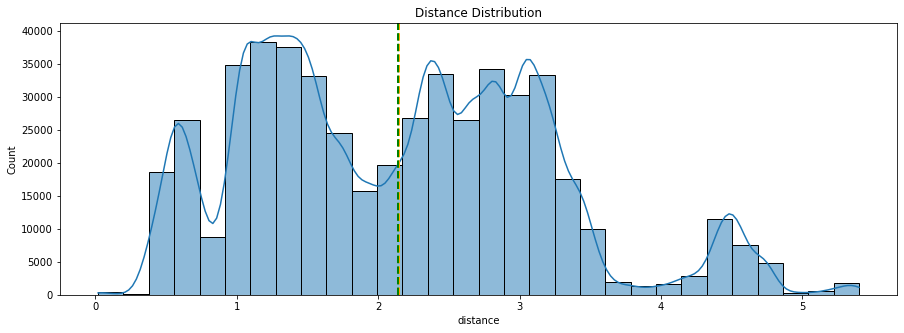

In [ ]:
# Display Histogram

plt.figure(figsize = (15,5))
sns.histplot(X_train_num['distance'], bins=30, kde=True)
# sns.displot(X_train_num['distance'], kde=True, label='Standard deviation on the Data')
plt.axvline(X_train_num['distance'].mean(), color='orange', linestyle='dashed', linewidth=2)
plt.axvline(X_train_num['distance'].median(), color='green', linestyle='dashed', linewidth=2)
plt.title('Distance Distribution')

Grafik di atas menggambarkan distribusi persebaran data distance yang outliernya sudah di handle. Karena datanya bukan termasuk distribusi normal, maka scaling nya akan digunakan Min and Max Scaler.

In [ ]:
# Feature Scaling using MinMax Scaler

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train_num)
X_train_mm_scaled = mm_scaler.transform(X_train_num)
X_test_mm_scaled = mm_scaler.transform(X_test_num)

X_train_mm_scaled

array([[0.10408922],
       [0.10037175],
       [0.58736059],
       ...,
       [0.133829  ],
       [0.22490706],
       [0.13011152]])

## Feature Encoding

Kedua features categorical termasuk data nominal. Encode yang bisa digunakan untuk data categorical nominal adalah OneHotEncoder.

In [ ]:
# Feature encoding with OneHotEncoder encoder

OHE_encoder = OneHotEncoder()
OHE_encoder.fit(X_train_cat)
X_train_OHE_encoded = OHE_encoder.transform(X_train_cat).toarray()
X_test_OHE_encoded = OHE_encoder.transform(X_test_cat).toarray()

## Concat between Numerical Columns and Categorical Columns

In [ ]:
X_train_final = np.concatenate([X_train_mm_scaled, X_train_OHE_encoded], axis = 1)
X_test_final = np.concatenate([X_test_mm_scaled, X_test_OHE_encoded], axis = 1)


### Features Train

In [ ]:
# Display concated Features Train

X_train_final

array([[0.10408922, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10037175, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.58736059, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.133829  , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22490706, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13011152, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
# Get categorical name for column

cab_type_values = X_train['cab_type'].value_counts().index.tolist()

In [ ]:
# Sorting name for column

cab_type_values.sort()
print(cab_type_values)

['Black', 'Black SUV', 'Lux', 'Lux Black', 'Lux Black XL', 'Lyft', 'Lyft XL', 'Shared', 'UberPool', 'UberX', 'UberXL', 'WAV']


In [ ]:
# Convert array into dataframe
X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns+cab_type_values])

X_train_final_df

,distance,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0.104089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.100372,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.587361,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.182156,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.392193,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
504492,0.198885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
504493,0.198885,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504494,0.133829,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504495,0.224907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Reset surge_multiplier index to fit new dataframe

X_train_surge_multiplier.reset_index(drop=True, inplace=True)

In [ ]:
# Merge feature and display final Features train

X_train_final_df['surge_multiplier'] = X_train_surge_multiplier
X_train_final_df

,distance,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV,surge_multiplier
0,0.104089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.100372,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.587361,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.182156,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.392193,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504492,0.198885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
504493,0.198885,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
504494,0.133829,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
504495,0.224907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Features Test

In [ ]:
# Display concated Features Train

X_test_final

array([[0.19330855, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.59851301, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.26579926, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21189591, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.48141264, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.55762082, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# Get categorical name for column (done previously)
# Sorting name for column (done previously)
# Convert array into dataframe

X_test_final_df = pd.DataFrame(X_test_final, columns=[num_columns+cab_type_values])

X_test_final_df

,distance,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0.193309,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.598513,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.265799,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.330855,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.202602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127714,0.425651,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127715,0.566914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
127716,0.211896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
127717,0.481413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# Reset surge_multiplier index to fit new dataframe

X_test_surge_multiplier.reset_index(drop=True, inplace=True)

In [ ]:
#  Merge feature and display final Features test

X_test_final_df['surge_multiplier'] = X_test_surge_multiplier
X_test_final_df

,distance,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV,surge_multiplier
0,0.193309,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.598513,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.265799,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.330855,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.202602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127714,0.425651,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
127715,0.566914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
127716,0.211896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
127717,0.481413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# 6 - Model Definition

Notes :
1. Algoritma yang dipakai adalah Linear "Linear Regression" (Sesuai Objective)
2. Metrics yang akan dipakai adalah "RMSE (Root Mean Square Error)"

In [ ]:
# Modelling using Linear Regression

lin_reg_model = LinearRegression(fit_intercept=True)

# 7 - Model Training

In [ ]:
# Training using Linear Regression

lin_reg_model.fit(X_train_final_df,y_train)

/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

# 8 - Model Evaluation

Sebelumnya sudah dijelaskan bahwa model evaluation yang akan dipilih adalah RMSE (Root Mean Square Error). Metrics ini menghitung erorr dari akar MSE (Mean Square Error) dimana MSE menghitung error berdasarkan rata-rata perbedaan kuadrat antara prediksi dan nilai sebenarnya. Nilai yang dihasilkan biasanya lebih besar dari MAE karena RMSE mengkuadratkan perbedaan tersebut. Metrics RMSE sensitive terhadap Outlier. Oleh karena itu sebelumnya pada fitur 'distance' outliernya dihapus terlebih dahulu.

`Dibandingkan dengan MAE, RMSE akan memberikan bobot kesalahan yang lebih tinggi dan menghukum kesalahan besar dalam model.`

In [ ]:
# Predict Linear regression model

y_pred_train = lin_reg_model.predict(X_train_final_df)
y_pred_test = lin_reg_model.predict(X_test_final_df)

/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
# Evaluate with numerical performance Metrices - MAE?

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

RMSE train =  2.4416616061504497
RMSE test =  2.529702680749566


Berdasarkan hasil evaluasi RMSE diatas, dihasilkan errornya pada train sebesar 2.441 dan test sebesar 2.529. Error pada train lebih sedikit dari pada error di test oleh karena itu model ini dapat dikategorikan sebagai model yang overfit.
Selain itu error ini dapat menjadi indikator apakah akurasinya sudah baik atau belum. Pada hasil RSME diatas, hasilnya sudah melebihi 0,5 yang artinya model belum cukup optimal. Hasil RMSE juga dapat dibandingkan dengan hasil evaluasi yang lain di bawah.

In [ ]:
print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))

print('MSE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test))

print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))

MAE train =  1.7383568201656798
MAE test =  1.7879315947632106
MSE train =  5.961711398949195
MSE test =  6.39939565299154
r2score train =  0.929895012499297
r2score test =  0.9263518465695344


# 9 - Model Inference

In [ ]:
# Savinng files

with open('model_lin_reg.pkl','wb') as file_1:
    joblib.dump(lin_reg_model, file_1)

with open('model_mm_scaler.pkl', 'wb') as file_2:
     joblib.dump(mm_scaler, file_2)

with open('model_OHE_encoder.pkl', 'wb') as file_3:
     joblib.dump(OHE_encoder, file_3)

with open('list_num_cols.txt', 'w') as file_4:
     json.dump(num_columns, file_4)

with open('list_cat_cols.txt', 'w') as file_5:
     json.dump(cat_columns, file_5)


In [ ]:
# Open model from directory

with open('model_lin_reg.pkl','rb') as file_1:
    lin_reg_model = joblib.load(file_1)

with open('model_mm_scaler.pkl','rb') as file_2:
    mm_scaler = joblib.load(file_2)

with open('model_OHE_encoder.pkl','rb') as file_3:
    OHEord_encoder = joblib.load(file_3)

with open('list_num_cols.txt','r') as file_4:
    list_num_cols = json.load(file_4)

with open('list_cat_cols.txt','r') as file_5:
    list_cat_cols = json.load(file_5)

In [ ]:
# Split between numerical columns and categorical columns

data_inf_num = df_inf[list_num_cols]
data_inf_cat = df_inf[list_cat_cols]

In [ ]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = mm_scaler.transform(data_inf_num)
data_inf_cat_encoded = OHE_encoder.transform(data_inf_cat).toarray()
data_inf_cat_encoded

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [ ]:
# Concate Numerical Columns and Categorical Columns

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis = 1)
data_inf_final

array([[0.39962825, 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.21189591, 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.27509294, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ],
       [0.22118959, 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.29553903, 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.35501859, 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.     

In [ ]:
# Get the data which not being scaled or encodoed from inference
df_inf_surge_multiplier = df_inf['surge_multiplier']

# Reshape into array to fit final inference data
df_inf_surge_multiplier = np.array(df_inf_surge_multiplier).reshape(10,1)
df_inf_surge_multiplier


array([[1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.25],
       [1.  ]])

In [ ]:
# Concate previous unscaled or unencoded to final inference data

data_inf_final = np.concatenate([data_inf_final, df_inf_surge_multiplier], axis = 1)
data_inf_final

array([[0.39962825, 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.21189591, 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.27509294, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 1.        ],
       [0.22118959, 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.29553903, 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.35501859, 0.        , 0. 

In [ ]:
# Predict inference Linear regression

y_pred_inf = lin_reg_model.predict(data_inf_final)
y_pred_inf

array([30.13476562, 27.25292969,  7.89257812, 14.30371094, 28.53710938,
        8.203125  , 33.07324219,  4.23535156, 23.08203125, 15.62890625])

In [ ]:
# Create DataFrame of price's Prediction

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Price - Prediction'])
y_pred_inf_df

,Price - Prediction
0,30.134766
1,27.252930
2,7.892578
3,14.303711
4,28.537109
5,8.203125
6,33.073242
7,4.235352
8,23.082031
9,15.628906


In [ ]:
# Concate prediction to raw inference data table

df_inf_with_pred = pd.concat([df_inf, y_pred_inf_df], axis = 1)
df_inf_with_pred

,id,timestamp,hour,day,month,datetime,timezone,source,destination,service_provider,product_id,cab_type,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,weather_info,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,Price - Prediction
0,10c861ba-0259-4307-be1c-7177201f21f5,1.543323e+09,12,27,11,2018-11-27 12:45:22,America/New_York,North Station,South Station,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,28.5,2.17,1.00,42.3519,-71.0551,46.30,44.19,Light Rain,Light rain in the morning.,0.0288,0.94,0.91,4.54,4.54,1543338000,3.295,46.89,1543320000,33.70,1543399200,43.85,1543320000,29.88,1543399200,rain,43.94,988.29,201,1.00,0,3.295,314.0,1543319466,1543353345,0.68,0.1420,1543338000,35.98,1543377600,46.89,1543320000,31.86,1543377600,43.85,1543320000,30.134766
1,3dd287e1-7ea7-4dcb-8cbf-fb41b43f621d,1.544813e+09,18,14,12,2018-12-14 18:45:12,America/New_York,Haymarket Square,Theatre District,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.5,1.16,1.00,42.3519,-71.0551,45.82,43.61,Mostly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.51,4.57,4.57,1544846400,9.898,46.65,1544814000,40.76,1544835600,43.86,1544817600,38.56,1544835600,partly-cloudy-day,28.63,1029.95,165,0.56,1,9.898,288.5,1544789234,1544822013,0.24,0.0000,1544806800,27.18,1544781600,46.65,1544814000,24.51,1544785200,43.86,1544817600,27.252930
2,c8db3ae3-b4db-46a0-b0ea-9e0119efb287,1.543499e+09,13,29,11,2018-11-29 13:48:03,America/New_York,Fenway,Back Bay,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,7.0,1.50,1.00,42.3503,-71.0810,40.29,34.72,Clear,Partly cloudy throughout the day.,0.0000,0.00,0.60,8.44,12.52,1543514400,9.997,44.89,1543510800,28.64,1543579200,38.68,1543510800,29.29,1543579200,clear-day,27.46,1005.85,309,0.12,0,9.997,335.5,1543492406,1543526101,0.75,0.0000,1543510800,35.26,1543550400,44.89,1543510800,31.25,1543550400,38.68,1543510800,7.892578
3,2bb2794f-6a41-421b-971e-a5b10cbdaa0e,1.543527e+09,21,29,11,2018-11-29 21:33:03,America/New_York,Haymarket Square,Theatre District,Lyft,lyft_premier,Lux,13.5,1.21,1.00,42.3519,-71.0551,41.97,36.09,Partly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.55,10.00,15.17,1543514400,9.784,44.76,1543510800,28.78,1543579200,38.44,1543510800,26.32,1543575600,partly-cloudy-night,26.82,1008.97,310,0.31,0,9.784,305.7,1543492400,1543526095,0.75,0.0000,1543510800,35.12,1543550400,44.76,1543510800,30.85,1543550400,38.44,1543510800,14.303711
4,a416d46b-4548-4b26-8b50-5b8437ffd63a,1.543757e+09,13,2,12,2018-12-02 13:23:02,America/New_York,Theatre District,Haymarket Square,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.5,1.61,1.00,42.2148,-71.0330,43.57,39.80,Light Rain,Rain throughout the day.,0.0801,1.00,0.92,6.34,7.01,1543755600,2.636,52.86,1543788000,46.60,1543824000,52.19,1543788000,47.25,1543824000,rain,41.38,1015.39,111,1.00,1,2.636,274.6,1543751761,1543785256,0.86,0.1055,1543770000,36.35,1543726800,52.86,1543788000,35.33,1543744800,52.19,1543788000,28.537109
5,868db583-7372-4563-8e73-44640edba186,1.543453e+09,0,29,11,2018-11-29 00:48:41,America/New_York,South Station,North Station,Lyft,lyft,Lyft,9.0,1.93,1.00,42.3503,-71.0810,39.41,33.81,Mostly Cloudy,Mostly cloudy throughout the day.,0.0000,0.00,0.69,8.11,12.21,1543431600,9.996,42.72,1543438800,37.59,1543485600,36.75,1543438800,32.25,1543478400,partly-cloudy-night,30.16,996.21,294,0.81,0,9.996,352.8,1543405940,1543439725,0.72,0.0000,1543420800,33.82,1543399200,42.72,1543438800,30.19,1543399200,36.

In [ ]:
# Display the comparison for actual and prediction

df_inf_with_pred[['cab_type','distance','surge_multiplier','price','Price - Prediction']]

,cab_type,distance,surge_multiplier,price,Price - Prediction
0,Black SUV,2.17,1.00,28.5,30.134766
1,Black SUV,1.16,1.00,27.5,27.252930
2,WAV,1.50,1.00,7.0,7.892578
3,Lux,1.21,1.00,13.5,14.303711
4,Black SUV,1.61,1.00,27.5,28.537109
5,Lyft,1.93,1.00,9.0,8.203125
6,Black SUV,3.20,1.00,31.0,33.073242
7,UberPool,0.56,1.00,6.5,4.235352
8,Lux,2.68,1.25,27.5,23.082031
9,UberXL,2.17,1.00,14.0,15.628906


# 10 - Conclusion

EDA (Exploratory Data Analysis)

- Terdapat sebanyak 693070 penumpang yang memilih Uber atau Lift sebagai opsi ride provider selama Bulan November dari tanggal 26 sampai Desember tanggal 18 di tahun 2018.
- Selama 2 bulan terakhir di tahun 2018, secara berturut-turut Uber memiliki penumpang yang lebih banyak jumlahnya dari Lyft dengan total selisih selama 2 bulan sebanyak 78255 penumpang. 
- Data yang tersedia tersebut diambil dari tanggal 1 sampai tanggal 30 setiap bulannya untuk kedua platform. Ada beberapa tanggal yang missing yaitu tanggal 5-8, 11-12, 19-25, dan tanggal 31. Rentan data pada tanggal 1-18 diambil dari bulan 11 sedangkan sisanya yaitu tanggal 26-30 diambil dari bulan 12. Tidak diketahui apa faktor ketidaksediaan date tersebut. Namun berdasarkan data yang tersedia dapat dilihat bahwa tanggal yang paling ramai penumpang ada di range tanggal 27-29.
- Waktu yang paling ramai penumpang adalah malam hari yaitu pada jam 11-12 malam sedangkan waktu yang paling sedikit penumpang adalah pagi hari yaitu pada jam 8 pagi. Data diambil satu hari full dari pukul 12 pagi (0) hingga pukul 11 malam (23). 
- Terdapat kecenderungan hubungan positif antara 'price' dengan 'distance' dimana semakin jauh distance maka seakin tinggi price nya. Ada beberapa faktor lain yang kemungkinan mempengaruhi harga selain jarak.
- Dua platform jasa kendaraan pada dataset tersebut masing-masing memiliki jenis kendaraannya sendiri. Untuk Uber terdapat UberXL, WAV, Black SUV, Black, Taxi, UberX, dan UberPool sedangkan Lyft terdapat Lux, Lyft, Lux Black XL, Lyft XL, Lux Black, and Shared. Beberapa 'cab_type' tersebut dibagi berdasarkan jenis, ukuran atau value kendaraannnya (biasanya untuk event).
- Masing-masing jenis kendaraan sebelumnya meemiliki 'price' yang berbeda. 
- Kurang dijelaskan di dataset bahwa kemungkinan terdapat variabel lain sepert durasi penyewaan atau durasi menumpang, diskon, atau promo yang mungkin bisa mempengaruhi tarif kendaraan tersebut. 
- 'surge multiplier' adalah pemberian tarif sesuai dengan suatu kondisi dimana jumlah penumpang yang available lebih banyak dari jumlah driver yang available. Jadi  Surge multiplier tersebut merupakan salah satu faktor yang menentukan tarif akhir 'price' disuatu waktu karena setap saat suply dan demand dapat berubah-ubah. Surge ini merupakan nominal yang yang sudah ditentukan.
- Kebanyakan penumpang ramai menggunakan jasa transportasi tersebut saat cuacanya mendung (overcast) namun dari grafik cuaca tidak berpengaruh terhadap tarif sewa/menumpang.
- Suhu tidak berpengaruh terhadap tarif sewa/menumpang.
- 'cab_name' dan 'surge_multiplier' mempengaruhi 'price'. Namun untuk 'source' dan 'destination' sudah didefiniskan dengan distance. Selain itu ada kecenderungan histori perjalanan diambil dari penumpang yang 'source' dan 'destination' nya sama.

Variabel Independent yang digunakan pada akhirnya adalah 'cab_type', 'surge_multiplier', dan 'distance'. Ketiga variabel tersebut independent terhadap satu sama lain dan mempengaruhi 'price' berdasarkan korelasi-korelasi yang sudah dianalisis sebelumnya. Pada data numerik 'distance' dihapus outliernya dan di scaling dengan Min and Max scaler sedangkan yang data kategorikal 'cab_type' dan 'surge_multiplier' di encoding dengan One Hot Encoder. Sesuai dengan ketentuan, model yang digunakan adalah Model Linear Regression yang kemudian dievaluasi dengan RMSE. Dari error yang dihasilkan train dan test yaitu sebsar 2.441 dan 2.529 tersebut dapat di ketahui bahwa model masih tergolong belum optimal dan masuk kedalam overfit.

Jika dilihat dari fitur yang ada sebelumnya korelasi antara price dengan variabel lainnya masih belum tinggi. Agar model dapat mencapai hasil akurasi yang tinggi, bisa dilakukan percobaan dengan menguji model yang lainnya seperti polynomial regression, Ridge regression, lasso, dan lain-lain. 

## 1.  Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !

Terdapat 4 asumsi yang ada pada Linear Regression
1. Linearity : Hubungan Linier antara variabel dependent (y) dan independent (X).
Pada regresi linier, garis lurus menjadi acuan persebaran data pada grafik. Alokasi masing-masing titik persebaran harus mengikuti alur garis lurus tersebut. Apabila benntuk alur datanya melengkung atau berbentuk lain, maka data tersebut hubungannya adalah non linear.

2. Normality : Semua residual atau error terms adalah terdistribusi normal. Dapat diperiksa distribusi normalmya dengan Distribution plot atau quantil-quantil plot seperti pada contoh graphic dibawah.

/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'frequency')

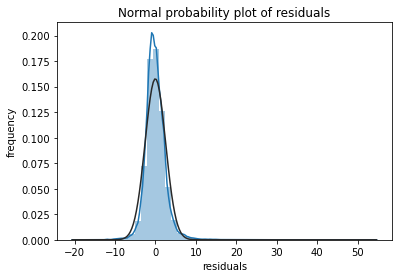

In [ ]:
residual = y_test - y_pred_test
sns.distplot(residual , fit=norm)
plt.title("Normal probability plot of residuals")
plt.xlabel("residuals")
plt.ylabel("frequency")

Grafik di atas menunjukan bahwa residual target beserta presiksinya nyaris berdistribusi normal (nyaris karena masih condong kekiri). Sama halnya dengan grafik qq plot dibawah.

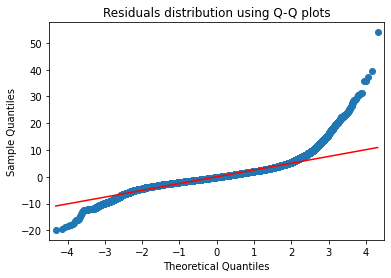

In [ ]:
data = residual
sm.qqplot(data, line ='s')
py.title("Residuals distribution using Q-Q plots")
py.show()

Apabila memakai target pada studi kasus datanya tidak lurus namun apabila datany lurus mengikuti garis merah maka residualnya berdistribusi normal.

3. Independence : Tidak boles ada multicollinearity dimana multicollinearity ini adalah fitur atau variabel independen dari kumpulan data yang diberikan sangat berhubungan dengan satusama lain.kesalahan standar cenderung meningkat karena adanya variabel berkorelasi. Multicollinearity dapat ditest dengan uji korelasi seperti heatmap.

4. Homoscedasity : Maksudnya adalah variance dari residual harus sama dari setiap X. Apabila variencenya tidak sama seperti cenderung semakin melebar atau menyempit atau tak beraturan maka dapat disebut dengan heteroscedacity. 

## 2.  Tunjukkan dan tafsirkan arti dari coefficient dan slope yang didapat dari model yang telah Anda bangun !

Sebelumnya kita telah menantukan variabel apa yang ingin kita prediksi. Pada kasus ini kita akan memprediksi 'price'. Selanjutnya kita mencari keterkaitan variabel tersebut dengan variabel lainnya entah korelasi tersebut berdampak positif atau negatif untuk variabel tersebut. Sebelumnya kita mendapat bahwa variabel yang dipilih tersebut adalah 'distance' ,'cab_type', dan 'surge_multiplier'. Rumus Umum Regresi Linear didefenisikan sebagai

y=ax+b

 - y adalah variabel dependen atau target. 
 - x adalah variabel independen atau regressor;
 - b adalah parameter model, yang mengukur pengaruh variabel penjelas terhadap regresi.

 Karena sebelumnya model sudah di fit denan Linear regression model maka, dapat mencari koefisiennya dengan syntax berikut

In [ ]:
# Display Coefficient

lin_reg_model.coef_

array([1.53489025e+01, 7.08684428e+12, 7.08684428e+12, 7.08684428e+12,
       7.08684428e+12, 7.08684428e+12, 7.08684428e+12, 7.08684428e+12,
       7.08684428e+12, 7.08684428e+12, 7.08684428e+12, 7.08684428e+12,
       7.08684428e+12, 1.83356415e+01])

Coefficient atau kemiringan adalah kecuraman garis regresi, yang menunjukkan rata-rata atau perubahan yang diharapkan dalam 'price' (y) untuk setiap perubahan di variabel  X (distance, cab_type, dan surge_multiplier). Koefision yang dihasilkan di atas dikalikankan dengan variabel prediktor masing-masing sebagai perumpamaan 1.53489025e+01 dikalikan dengan distance, 7.08684428e+12 masing-masing dikalikan dengan cab_type, dan 1.83356415e+01 dikalikan dengan surge_multiplier. Hasil dari kemiringan ini memberikan suatu lokasi titik yang nantinya akan menghasilkan price setelah di tambah dengan intersep.

In [ ]:
# Display Intercept

lin_reg_model.intercept_

-7086844283592.691

Intersep adalah konstanta dalam model regresi yang mewakili nilai rata-rata dari variabel respon ketika semua variabel prediktor dalam model sama dengan nol. Sebagai contoh, dari hasil intercept di atas rata-rata price akan dihasilkan -7086844283592.691 jika semua variable x1, x2, x3,... nya sama dengan 0. Pada kasus ini hal tersebut tidak berlaku karena nominal tarif tidak mungkin minus. Namun untuk menentukan harga setidaknya ada salah satu kendaraan yang dipilih besrta kepadatan demandnya (surge_multiplier) sehingga price tidak mungkin dihasilkan 0.  

In [ ]:
# Display Variable

X_train_final_df.columns

MultiIndex([(        'distance',),
            (           'Black',),
            (       'Black SUV',),
            (             'Lux',),
            (       'Lux Black',),
            (    'Lux Black XL',),
            (            'Lyft',),
            (         'Lyft XL',),
            (          'Shared',),
            (        'UberPool',),
            (           'UberX',),
            (          'UberXL',),
            (             'WAV',),
            ('surge_multiplier',)],
           )

Terakhir variabel bebas (x1, x2, ... ,x14) yang dapat berubah-ubah. Apabila terdapat data baru yang akan di prediksi, bisa dilakukan dengan menggunakan model dengan memasukkan variabel dari nama kolom diatas.

REFERENCE :

1. https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression4.html
2. https://dataaspirant.com/assumptions-of-linear-regression-algorithm/
3. https://www.aionlinecourse.com/tutorial/machine-learning/evaluating-regression-models-performance